In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import shutil

In [2]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils

print()

In [3]:
temp_dir = './temp/'
if os.path.exists(temp_dir):
    shutil.rmtree(temp_dir)
    os.makedirs(temp_dir)
    print('Clear the directory: {}\n'.format(temp_dir))
else:
    os.makedirs(temp_dir)
    print('Create the directory: {}\n'.format(temp_dir))

def savefig(fig, file_name):
    fig.savefig(temp_dir + file_name + '.png')
    print('Image file saved:', temp_dir + file_name + '.png')

Clear the directory: ./temp/



In [4]:
print('Loading data...')
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()
print('Done')
print("x_train_image.shape = {}".format(x_train_image.shape))
print("y_train_label.shape = {}".format(y_train_label.shape))
print(" x_test_image.shape = {}".format(x_test_image.shape))
print(" y_test_label.shape = {}\n".format(y_test_label.shape))

Loading data...
Done
x_train_image.shape = (60000, 28, 28)
y_train_label.shape = (60000,)
 x_test_image.shape = (10000, 28, 28)
 y_test_label.shape = (10000,)



Image file saved: ./temp/images_train_0_7.png



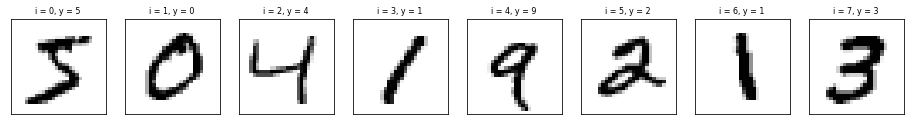

In [5]:
images_per_row = 8
defualt_row_number = 1
max_row_number = 3

def plot_images_labels_prediction(images, labels,
                                  prediction = [],
                                  start_index = 0,
                                  num = images_per_row * defualt_row_number):
    plt.clf()
    fig = plt.gcf()
    fig.set_size_inches(images_per_row * 2, images_per_row * 1.5)
    if num > images_per_row * max_row_number:
        raise ValueError("The maximum data number to print is " + str(images_per_row * max_row_number) + ".")
    for i in range(0, num):
        ax = plt.subplot(max_row_number, images_per_row, 1 + i)
        ax.imshow(images[start_index], cmap='binary')
        title = "i = " + str(start_index) + ", y = " + str(labels[start_index])
        if len(prediction) > 0:
            title += ", predict = " + str(prediction[start_index])
        ax.set_title(title, fontsize = 8)
        ax.set_xticks([])
        ax.set_yticks([])
        start_index += 1
#   plt.show()
    if len(prediction) <= 0:
        savefig(fig, 'images_train_' + str(start_index - num) + '_' + str(start_index - 1))
    else:
        savefig(fig, 'images_test_' + str(start_index - num) + '_' + str(start_index - 1))

plot_images_labels_prediction(x_train_image, y_train_label)
print()

In [6]:
# normalize input image, 0 < input < 1
def normalize_input(input_image):
    return input_image.reshape(input_image.shape[0], 28 * 28).astype('float64') / 255

# normalize output label as one-hot encoding, for example, 4 will normalize as [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
def normalize_output(output_label):
    return np_utils.to_categorical(output_label)

# data preprocessing
x_train = normalize_input(x_train_image)
x_test  = normalize_input(x_test_image)
y_train = normalize_output(y_train_label)
y_test  = normalize_output(y_test_label)

In [7]:
# create multi-layer preceptron neural network
model = Sequential()
# hidden layer 1
model.add(
    Dense(
        units = 100,
        input_dim = 784,
        activation = 'relu',
        kernel_initializer = 'normal',
        bias_initializer = 'normal'
    )
)
# dropout layer
model.add(
    Dropout(
        rate = 0.5
    )
)
# hidden layer 2
model.add(
    Dense(
        units = 10,
        activation = 'softmax',
        kernel_initializer = 'normal',
        bias_initializer = 'normal'
    )
)
print(model.summary(), '\n')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None 



In [8]:
# definite training method
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [9]:
# start training
train_history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 200,
    epochs = 20,
    validation_split = 0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 27us/step - loss: 0.7555 - acc: 0.7817 - val_loss: 0.3084 - val_acc: 0.9159
Epoch 2/20
48000/48000 [==============================] - 1s 30us/step - loss: 0.3773 - acc: 0.8917 - val_loss: 0.2355 - val_acc: 0.9351
Epoch 3/20
48000/48000 [==============================] - 1s 26us/step - loss: 0.3103 - acc: 0.9104 - val_loss: 0.1982 - val_acc: 0.9457
Epoch 4/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.2706 - acc: 0.9205 - val_loss: 0.1739 - val_acc: 0.9499
Epoch 5/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.2461 - acc: 0.9284 - val_loss: 0.1612 - val_acc: 0.9530
Epoch 6/20
48000/48000 [==============================] - 1s 24us/step - loss: 0.2256 - acc: 0.9342 - val_loss: 0.1461 - val_acc: 0.9596
Epoch 7/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.2125 - acc: 0.9381 - val_loss: 0.1362 - val_acc

In [10]:
def show_train_history(train_history, train, validation):
    plt.clf()
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
#   plt.show()
    savefig(plt, 'training_history_' + train)

Image file saved: ./temp/training_history_acc.png


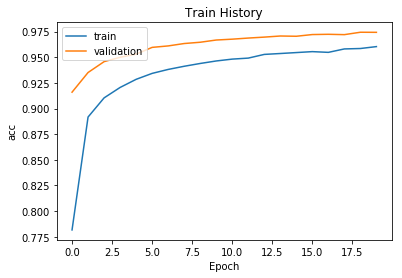

In [11]:
show_train_history(train_history, 'acc', 'val_acc')

Image file saved: ./temp/training_history_loss.png



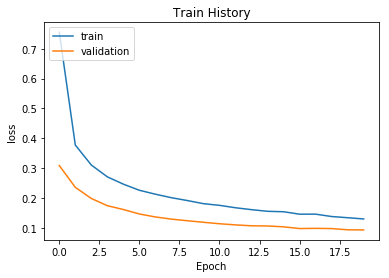

In [12]:
show_train_history(train_history, 'loss', 'val_loss')
print()

In [13]:
print('Evaluating: ')
scores = model.evaluate(x_test, y_test)
print("The loss of testing data:", scores[0])
print("The accuracy of testing data = {}%".format(scores[1] * 100.0))

Evaluating: 
10000/10000 [==============================] - 0s 24us/step
The loss of testing data: 0.09473799616615287
The accuracy of testing data = 97.09%


In [14]:
print('Predicting: ')
prediction = model.predict_classes(x_test, verbose = 1)
print(pd.crosstab(y_test_label, prediction, colnames=['predict'], rownames=['y']), '\n')

Predicting: 
10000/10000 [==============================] - 0s 20us/step
predict    0     1    2    3    4    5    6    7    8    9
y                                                         
0        971     0    2    2    0    1    2    1    1    0
1          0  1121    3    2    0    0    3    0    6    0
2          5     2  994    5    4    1    2    8   11    0
3          0     0    7  978    1    7    0    9    4    4
4          1     0    3    0  953    0    6    2    1   16
5          3     0    1   11    2  854    7    3    7    4
6          5     2    1    1    3    5  936    0    5    0
7          2     9   10    5    0    0    0  997    0    5
8          5     1    2    8    5    4    5    9  932    3
9          3     2    0    8   12    1    1    8    1  973 



In [15]:
print('Data frame for error cases:')
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})
error_list = df.loc[df.label != df.predict]
print(error_list, '\n')

Data frame for error cases:
      label  predict
8         5        6
151       9        8
233       8        7
247       4        6
259       6        0
321       2        7
340       5        3
381       3        7
445       6        0
449       3        5
495       8        0
551       7        1
565       4        9
582       8        2
591       8        3
613       2        8
659       2        8
684       7        3
691       8        4
707       4        9
720       5        8
740       4        9
844       8        7
881       4        9
900       1        3
924       2        7
938       3        5
947       8        9
951       5        4
956       1        2
...     ...      ...
9015      7        2
9019      7        2
9024      7        2
9280      8        5
9482      5        3
9587      9        4
9634      0        3
9642      9        7
9664      2        7
9679      6        3
9692      9        7
9700      2        8
9716      2        5
9729      5        6
9745  

The error case is at i = 5
Image file saved: ./temp/images_test_5_12.png



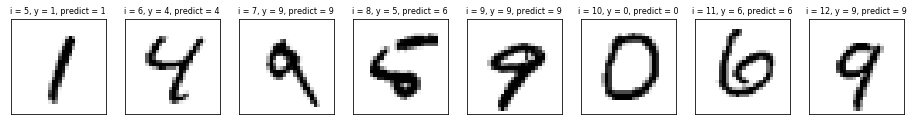

In [16]:
print("The error case is at i = {}".format(error_list.index[0] - 3))
plot_images_labels_prediction(x_test_image, y_test_label, prediction, start_index = max(0, error_list.index[0] - 3))
print()

In [17]:
print('Process ended.', '\n')

Process ended. 

